# Fredholm Neural Network (FNN)

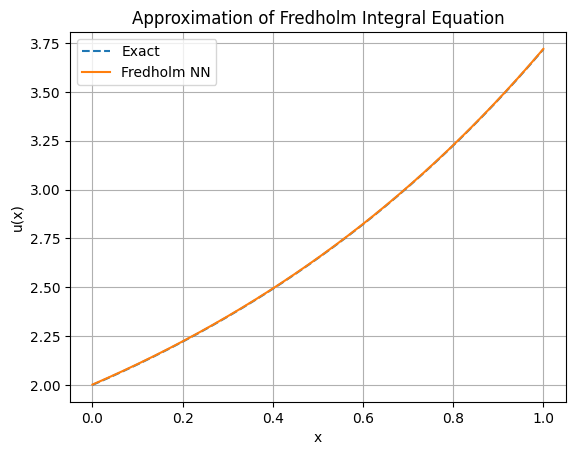

MAE: 1.6208e-03


In [3]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt

class FredholmNN(nn.Module):
    def __init__(self, x_grid, num_iterations=10):
        super(FredholmNN, self).__init__()
        self.x_grid = x_grid  # Inputs
        self.y_grid = x_grid.clone()  # Quadrature grid
        self.dy = (self.y_grid[1] - self.y_grid[0]).item()
        self.M = num_iterations
        self.kernel_value = 1.0 / math.e  # K(x, y) = 1/e
        self.g = torch.exp(self.x_grid)  # g(x) = e^x

    def forward(self):
        # Initial value f_0 = g(x)
        f = self.g.clone()

        for _ in range(self.M):
            # Numerical quadrature f
            integral = torch.sum(f) * self.kernel_value * self.dy
            # Update f_{n+1}(x) = g(x) + integral
            f = self.g + integral

        return f

# Domain definition
x_vals = torch.linspace(0, 1, 1000)
model = FredholmNN(x_vals, num_iterations=10)
with torch.no_grad():
    u_pred = model()

# Analytical Solution: u(x) = e^x + 1
u_exact = torch.exp(x_vals) + 1

# Plot
plt.plot(x_vals, u_exact, label='Exact', linestyle='--')
plt.plot(x_vals, u_pred, label='Fredholm NN')
plt.legend()
plt.title("Approximation of Fredholm Integral Equation")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.show()

# Error
error = torch.abs(u_exact - u_pred)
print(f"MAE: {torch.mean(error).item():.4e}")
